In [2]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [3]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [4]:
blobR = 21

In [5]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_FS = f'ereco_FULLSIM_R{blobR}mm.npz' 
npz_filename_DS = f'ereco_DETSIM_R{blobR}mm.npz' 
npz_filename_DS_p200 = f'ereco_DETSIM_psf200_R{blobR}mm.npz' 

In [6]:
d_FS = np.load(npz_path+npz_filename_FS)
d_DS = np.load(npz_path+npz_filename_DS)
d_DS_p200 = np.load(npz_path+npz_filename_DS_p200)

In [7]:
reco_0nubb_e_FS = d_FS['reco_0nubb_e']
reco_0nubb_e_DS = d_DS['reco_0nubb_e']
reco_0nubb_e_DS_p200 = d_DS_p200['reco_0nubb_e']

reco_selectron_e_FS = d_FS['reco_selectron_e']
reco_selectron_e_DS = d_DS['reco_selectron_e']
reco_selectron_e_DS_p200 = d_DS_p200['reco_selectron_e']


In [8]:
#Check limits of the Energy ROI 

emin = 2.40
emax = 2.54

## Track Energy

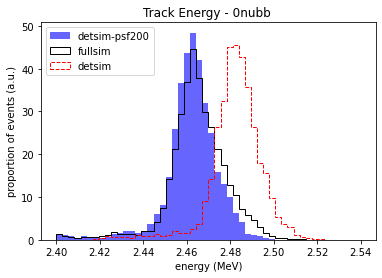

In [9]:
#Check the number of tracks with numb_of_tracks

plt.hist(reco_0nubb_e_DS_p200[0], bins = 50, range = (emin, emax), density=True, alpha=0.6, color='b', label = 'detsim-psf200')
plt.hist(reco_0nubb_e_FS[0], bins = 50, range = (emin, emax), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(reco_0nubb_e_DS[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

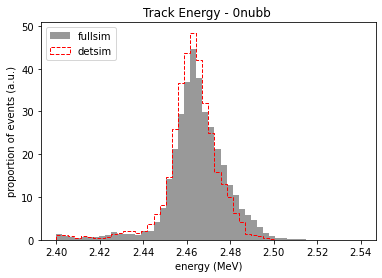

In [10]:
plt.hist(reco_0nubb_e_FS[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_p200[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

In [31]:
print("FULLSIM Mean = {:.5f} +- {:.5f}".format(np.mean(reco_0nubb_e_FS[0]), 
                                               np.std(reco_0nubb_e_FS[0])/np.sqrt(np.sum(reco_0nubb_e_FS[0]))))
print("DETSIM-psf200 Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_p200[0]), 
                                                                        np.std(reco_0nubb_e_DS_p200[0]/np.sqrt(np.sum(reco_0nubb_e_DS_p200[0]))),
                                                              100*np.mean(reco_0nubb_e_FS[0])/ np.mean(reco_0nubb_e_DS_p200[0])))
print("DETSIM Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS[0]),
                                                                  np.std(reco_0nubb_e_DS[0])/np.sqrt(np.sum(reco_0nubb_e_DS[0])),
                                                       100*np.mean(reco_0nubb_e_FS[0])/ np.mean(reco_0nubb_e_DS[0])))


FULLSIM Mean = 2.46466 +- 0.00014
DETSIM-psf200 Mean = 2.46217 +- 0.00012 -> FS/DS = 100.10%
DETSIM Mean = 2.48243 +- 0.00012 -> FS/DS = 99.28%


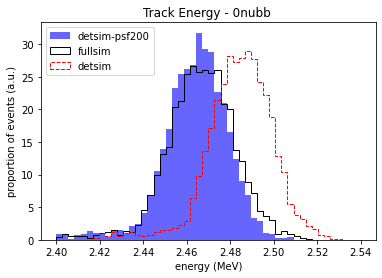

In [25]:
#Check the number of tracks with numb_of_tracks

plt.hist(reco_selectron_e_DS_p200[0], bins = 50, range = (emin, emax), density=True, alpha=0.6, color='b', label = 'detsim-psf200')
plt.hist(reco_selectron_e_FS[0], bins = 50, range = (emin, emax), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(reco_selectron_e_DS[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

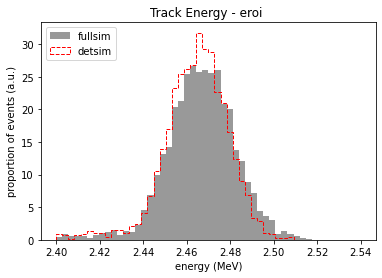

In [12]:
plt.hist(reco_selectron_e_FS[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_p200[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - eroi ')
plt.legend(loc=2);
plt.show()

In [35]:
print("FULLSIM Mean = {:.5f} +- {:.5f}".format(np.mean(reco_selectron_e_FS[0]),
                                              np.std(reco_selectron_e_FS[0])/np.sqrt(np.sum(reco_selectron_e_FS[0])) ))
print("DETSIM-psf200 Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS_p200[0]), 
                                                                        np.std(reco_selectron_e_DS_p200[0])/np.sqrt(np.sum(reco_selectron_e_DS_p200[0])),
                                                                        100*np.mean(reco_selectron_e_FS[0])/ np.mean(reco_selectron_e_DS_p200[0])))
print("DETSIM Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS[0]), 
                                                                 np.std(reco_selectron_e_DS[0])/np.sqrt(np.sum(reco_selectron_e_DS[0])), 
                                                                 100*np.mean(reco_selectron_e_FS[0])/ np.mean(reco_selectron_e_DS[0])))


FULLSIM Mean = 2.46652 +- 0.00016
DETSIM-psf200 Mean = 2.46421 +- 0.00015 -> FS/DS = 100.09%
DETSIM Mean = 2.48433 +- 0.00015 -> FS/DS = 99.28%


## BLOB Energy

### 0NUBB - BLOB1

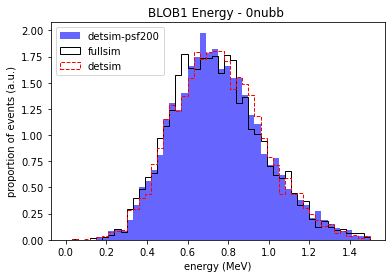

In [36]:
#Check the number of tracks with numb_of_tracks

plt.hist(reco_0nubb_e_DS_p200[1], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='b', label = 'detsim-psf200')
plt.hist(reco_0nubb_e_FS[1], bins = 50, range = (0, 1.5), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(reco_0nubb_e_DS[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

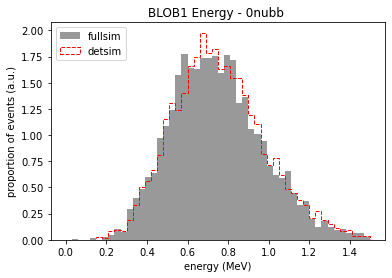

In [15]:
plt.hist(reco_0nubb_e_FS[1], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_p200[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

In [37]:
print("FULLSIM Mean = {:.3f} +- {:.3f}".format(np.mean(reco_0nubb_e_FS[1]), 
                                               np.std(reco_0nubb_e_FS[1])/np.sqrt(np.sum(reco_0nubb_e_FS[1]))))
print("DETSIM-psf200 Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_p200[1]), 
                                                                        np.std(reco_0nubb_e_DS_p200[1])/np.sqrt(np.sum(reco_0nubb_e_DS_p200[1])),
                                                              100*np.mean(reco_0nubb_e_FS[1])/ np.mean(reco_0nubb_e_DS_p200[1])))
print("DETSIM Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS[1]),
                                                                  np.std(reco_0nubb_e_DS[1])/np.sqrt(np.sum(reco_0nubb_e_DS[1])),
                                                       100*np.mean(reco_0nubb_e_FS[1])/ np.mean(reco_0nubb_e_DS[1])))


FULLSIM Mean = 0.748 +- 0.004
DETSIM-psf200 Mean = 0.757 +- 0.004 -> FS/DS = 98.87%
DETSIM Mean = 0.757 +- 0.004 -> FS/DS = 98.80%


### 0NUBB - BLOB2

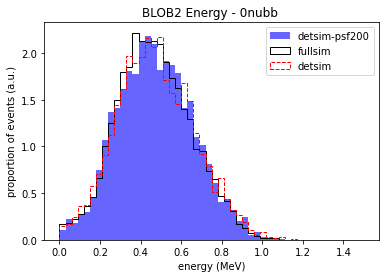

In [38]:
#Check the number of tracks with numb_of_tracks

plt.hist(reco_0nubb_e_DS_p200[2], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='b', label = 'detsim-psf200')
plt.hist(reco_0nubb_e_FS[2], bins = 50, range = (0, 1.5), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(reco_0nubb_e_DS[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - 0nubb ')
plt.legend(loc=1);
plt.show()

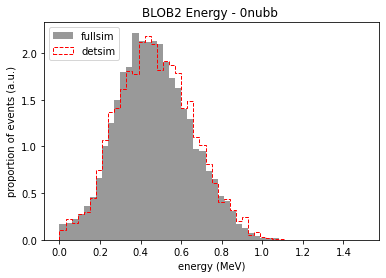

In [16]:
plt.hist(reco_0nubb_e_FS[2], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_p200[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

In [39]:
print("FULLSIM Mean = {:.3f} +- {:.3f}".format(np.mean(reco_0nubb_e_FS[2]), 
                                               np.std(reco_0nubb_e_FS[2])/np.sqrt(np.sum(reco_selectron_e_FS[2]))))
print("DETSIM-psf200 Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_p200[2]), 
                                                                        np.std(reco_0nubb_e_DS_p200[2])/np.sqrt(np.sum(reco_0nubb_e_DS_p200[2])),
                                                              100*np.mean(reco_0nubb_e_FS[2])/ np.mean(reco_0nubb_e_DS_p200[2])))
print("DETSIM Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS[2]),
                                                                  np.std(reco_0nubb_e_DS[2])/np.sqrt(np.sum(reco_0nubb_e_DS[2])),
                                                       100*np.mean(reco_0nubb_e_FS[2])/ np.mean(reco_0nubb_e_DS[2])))



FULLSIM Mean = 0.465 +- 0.006
DETSIM-psf200 Mean = 0.473 +- 0.004 -> FS/DS = 98.36%
DETSIM Mean = 0.474 +- 0.004 -> FS/DS = 98.11%


### EROI - BLOB1

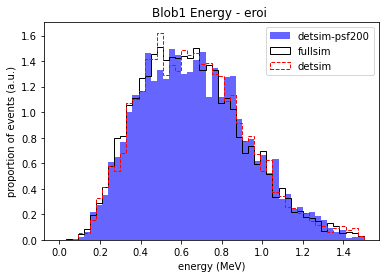

In [42]:
#Check the number of tracks with numb_of_tracks

plt.hist(reco_selectron_e_DS_p200[1], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='b', label = 'detsim-psf200')
plt.hist(reco_selectron_e_FS[1], bins = 50, range = (0, 1.5), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(reco_selectron_e_DS[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Blob1 Energy - eroi ')
plt.legend(loc=1);
plt.show()

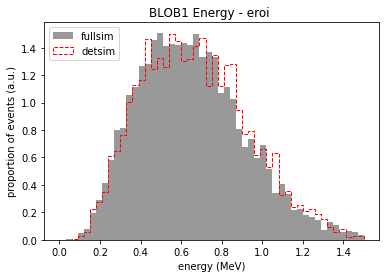

In [18]:
plt.hist(reco_selectron_e_FS[1], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_p200[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - eroi ')
plt.legend(loc=2);
plt.show()

In [41]:
print("FULLSIM Mean = {:.3f} +- {:.3f}".format(np.mean(reco_selectron_e_FS[1]),
                                              np.std(reco_selectron_e_FS[1])/np.sqrt(np.sum(reco_selectron_e_FS[1]))))
print("DETSIM-psf200 Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS_p200[1]), 
                                                                        np.std(reco_selectron_e_DS_p200[1])/np.sqrt(np.sum(reco_selectron_e_DS_p200[1])),
                                                                        100*np.mean(reco_selectron_e_FS[1])/ np.mean(reco_selectron_e_DS_p200[1])))
print("DETSIM Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS[1]), 
                                                                 np.std(reco_selectron_e_DS[1])/np.sqrt(np.sum(reco_selectron_e_DS[1])), 
                                                                 100*np.mean(reco_selectron_e_FS[1])/ np.mean(reco_selectron_e_DS[1])))


FULLSIM Mean = 0.659 +- 0.005
DETSIM-psf200 Mean = 0.672 +- 0.005 -> FS/DS = 98.09%
DETSIM Mean = 0.667 +- 0.005 -> FS/DS = 98.70%


### EROI - BLOB2

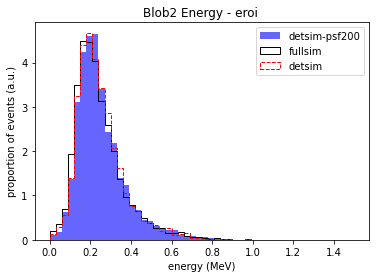

In [43]:
#Check the number of tracks with numb_of_tracks

plt.hist(reco_selectron_e_DS_p200[2], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='b', label = 'detsim-psf200')
plt.hist(reco_selectron_e_FS[2], bins = 50, range = (0, 1.5), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(reco_selectron_e_DS[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Blob2 Energy - eroi ')
plt.legend(loc=1);
plt.show()

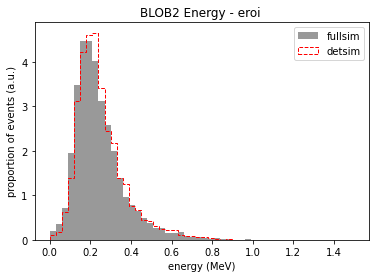

In [20]:
plt.hist(reco_selectron_e_FS[2], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_p200[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - eroi ')
plt.legend(loc=1);
plt.show()

In [19]:
print("FULLSIM Mean = {:.3f} +- {:.3f}".format(np.mean(reco_selectron_e_FS[2]),
                                              np.std(reco_selectron_e_FS[2])/np.sqrt(np.sum(reco_selectron_e_FS[2]))))
print("DETSIM-psf200 Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS_p200[2]), 
                                                                        np.std(reco_selectron_e_DS_p200[2])/np.sqrt(np.sum(reco_selectron_e_DS_p200[2])),
                                                                        100*np.mean(reco_selectron_e_FS[2])/ np.mean(reco_selectron_e_DS_p200[2])))
print("DETSIM Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS[2]), 
                                                                 np.std(reco_selectron_e_DS[2])/np.sqrt(np.sum(reco_selectron_e_DS[2])), 
                                                                 100*np.mean(reco_selectron_e_FS[2])/ np.mean(reco_selectron_e_DS[2])))


FULLSIM Mean = 0.243 +- 0.004
DETSIM-psf200 Mean = 0.247 +- 0.011 -> FS/DS = 98.40%
DETSIM Mean = 0.248 +- 0.004 -> FS/DS = 97.98%
